In [2]:
import numpy as np
import matplotlib.pyplot as plt
from GraphTool import Graph

file_name = "solomon_100/r101.txt"
graph = Graph(file_name)

In [3]:
best_routes = [
        [0, 2, 21, 73, 41, 56, 4, 0], 
        [0, 5, 83, 61, 85, 37, 93, 0], 
        [0, 14, 44, 38, 43, 13, 0], 
        [0, 27, 69, 76, 79, 3, 54, 24, 80, 0], 
        [0, 28, 12, 40, 53, 26, 0], 
        [0, 30, 51, 9, 66, 1, 0], 
        [0, 31, 88, 7, 10, 0], 
        [0, 33, 29, 78, 34, 35, 77, 0], 
        [0, 36, 47, 19, 8, 46, 17, 0], 
        [0, 39, 23, 67, 55, 25, 0], 
        [0, 45, 82, 18, 84, 60, 89, 0], 
        [0, 52, 6, 0], 
        [0, 59, 99, 94, 96, 0], 
        [0, 62, 11, 90, 20, 32, 70, 0], 
        [0, 63, 64, 49, 48, 0], 
        [0, 65, 71, 81, 50, 68, 0], 
        [0, 72, 75, 22, 74, 58, 0], 
        [0, 92, 42, 15, 87, 57, 97, 0], 
        [0, 95, 98, 16, 86, 91, 100, 0], 
    ]
my_routes = [
    [0, 2, 21, 73, 41, 56, 4, 0], 
    [0, 5, 83, 61, 85, 37, 93, 0], 
    [0, 12, 76, 79, 3, 54, 24, 80, 0], 
    [0, 14, 44, 38, 43, 13, 0], 
    [0, 27, 69, 30, 51, 20, 32, 70, 0], 
    [0, 28, 29, 78, 34, 35, 77, 0], 
    [0, 31, 88, 7, 0], 
    [0, 33, 81, 50, 68, 0], 
    [0, 36, 47, 19, 8, 46, 17, 0], 
    [0, 39, 23, 67, 55, 25, 0], 
    [0, 40, 53, 26, 0], 
    [0, 45, 82, 18, 84, 60, 89, 0], 
    [0, 52, 6, 0], 
    [0, 59, 99, 94, 96, 0], 
    [0, 62, 11, 90, 10, 0], 
    [0, 63, 64, 49, 48, 0], 
    [0, 65, 71, 9, 66, 1, 0], 
    [0, 72, 75, 22, 74, 58, 0], 
    [0, 92, 42, 15, 87, 57, 97, 0], 
    [0, 95, 98, 16, 86, 91, 100, 0]
]

In [4]:
best_info = {}
my_info = {}
best_obj = graph.evaluate(best_routes, info=best_info)
my_obj = graph.evaluate(my_routes, info=my_info)
print("best_obj = {}, my_obj = {}".format(best_obj, my_obj))

best_obj = 1650.7992395710683, my_obj = 1642.876874710345


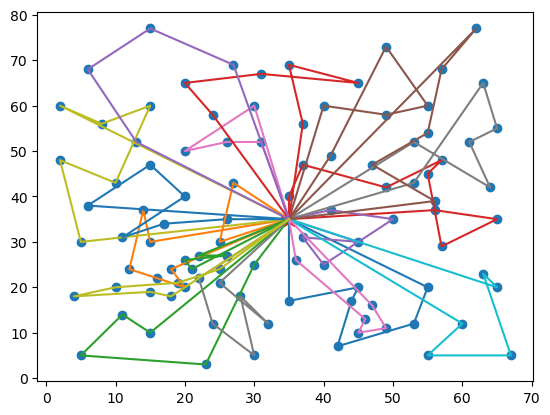

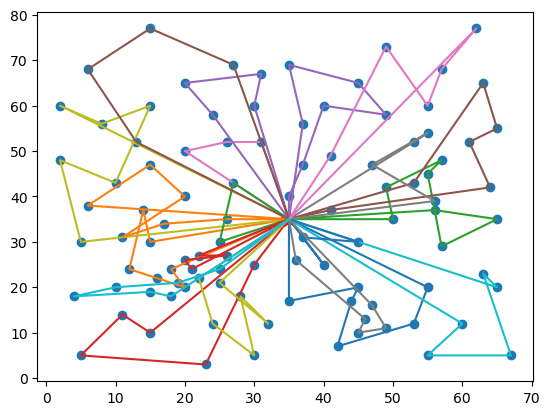

In [5]:
graph.render(best_routes)
graph.render(my_routes)

In [24]:
# get different routes
diff_routes = [route for route in best_routes if route not in my_routes]
diff_routes

[[0, 27, 69, 76, 79, 3, 54, 24, 80, 0],
 [0, 28, 12, 40, 53, 26, 0],
 [0, 30, 51, 9, 66, 1, 0],
 [0, 31, 88, 7, 10, 0],
 [0, 33, 29, 78, 34, 35, 77, 0],
 [0, 62, 11, 90, 20, 32, 70, 0],
 [0, 65, 71, 81, 50, 68, 0]]

In [25]:
# check constraints
for ri in range(len(diff_routes)):
    route = diff_routes[ri]
    load = sum(graph.demand[route])
    t = 0
    print("route {}: load = {}".format(ri, load))
    for i in range(1, len(route)):
        pi = route[i-1] 
        pj = route[i]
        t = t + graph.serviceTime[pi] + graph.timeMatrix[pi, pj]
        t = max(graph.readyTime[pj], t)
        if t > graph.dueTime[pj]:
            print("ERROR")
        print("current time: {:.2f}, due time: {}".format(t, graph.dueTime[pj]))

route 0: load = 98
current time: 37.00, due time: 47
current time: 54.28, due time: 60
current time: 77.28, due time: 83
current time: 97.28, due time: 102
current time: 116.00, due time: 126
current time: 142.12, due time: 150
current time: 162.12, due time: 163
current time: 182.00, due time: 192
current time: 213.10, due time: 230
route 1: load = 75
current time: 39.00, due time: 49
current time: 63.00, due time: 73
current time: 87.14, due time: 95
current time: 103.85, due time: 105
current time: 132.00, due time: 142
current time: 153.18, due time: 230
route 2: load = 82
current time: 71.00, due time: 81
current time: 90.22, due time: 98
current time: 106.54, due time: 107
current time: 130.86, due time: 137
current time: 166.16, due time: 171
current time: 191.39, due time: 230
route 3: load = 57
current time: 50.00, due time: 60
current time: 74.00, due time: 84
current time: 90.32, due time: 91
current time: 124.00, due time: 134
current time: 159.50, due time: 230
route 4: lo

In [23]:
# 检查graph数据问题
graph.readyTime
graph.dueTime
graph.serviceTime

array([ 0, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])